In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import geopandas as gpd
from shapely.geometry import Point

**1) Import data**

In [67]:
df = pd.read_csv("./workshop/project_1_python.csv")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180477 entries, 0 to 180476
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    180477 non-null  int64  
 1   iso_code                 180477 non-null  object 
 2   continent                180477 non-null  object 
 3   location                 180477 non-null  object 
 4   date                     180477 non-null  object 
 5   total_cases              173493 non-null  float64
 6   new_cases                173212 non-null  float64
 7   total_deaths             155323 non-null  float64
 8   new_deaths               155095 non-null  float64
 9   hosp_patients            27152 non-null   float64
 10  total_tests              78326 non-null   float64
 11  new_tests                74509 non-null   float64
 12  tests_per_case           92600 non-null   float64
 13  total_vaccinations       46366 non-null   float64
 14  peop

In [69]:
df.dtypes

index                        int64
iso_code                    object
continent                   object
location                    object
date                        object
total_cases                float64
new_cases                  float64
total_deaths               float64
new_deaths                 float64
hosp_patients              float64
total_tests                float64
new_tests                  float64
tests_per_case             float64
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
total_boosters             float64
new_vaccinations           float64
population                 float64
median_age                 float64
gdp_per_capita             float64
life_expectancy            float64
latitude                   float64
longitude                  float64
dtype: object

**2) first visualization**

In [70]:
df["location"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 

In [71]:
# Grouping and selecting data by country code (iso_code)
df_grouped = df.groupby("iso_code", as_index=False).first()[["iso_code", "population"]]
df_grouped = df_grouped.sort_values(by="population", ascending=False).head(10)

In [72]:
# Grouping and selecting data by country name (location)
df_grouped_location = df.groupby("location", as_index=False).first()[["location", "population"]]
df_grouped_location = df_grouped_location.sort_values(by="population", ascending=False).head(10)

In [73]:
# Setting the chart style 
sns.set_theme(
    style="whitegrid",
    context='talk', 
    palette="pastel",
)

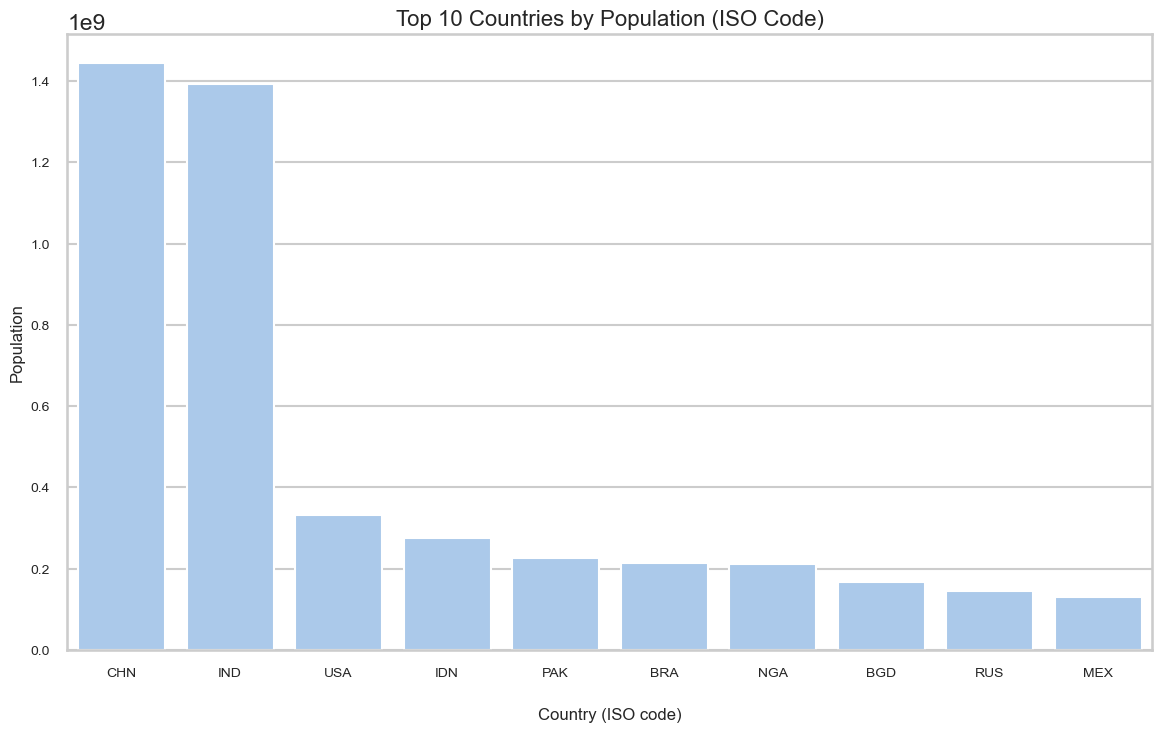

In [74]:
# 1. Graf: Population per country using iso_code
plt.figure(figsize=(14, 8))
sns.barplot(x="iso_code", y="population", data=df_grouped)
plt.title("Top 10 Countries by Population (ISO Code)", fontsize=16)
plt.xlabel("Country (ISO code)", fontsize=12, labelpad=20)
plt.ylabel("Population", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

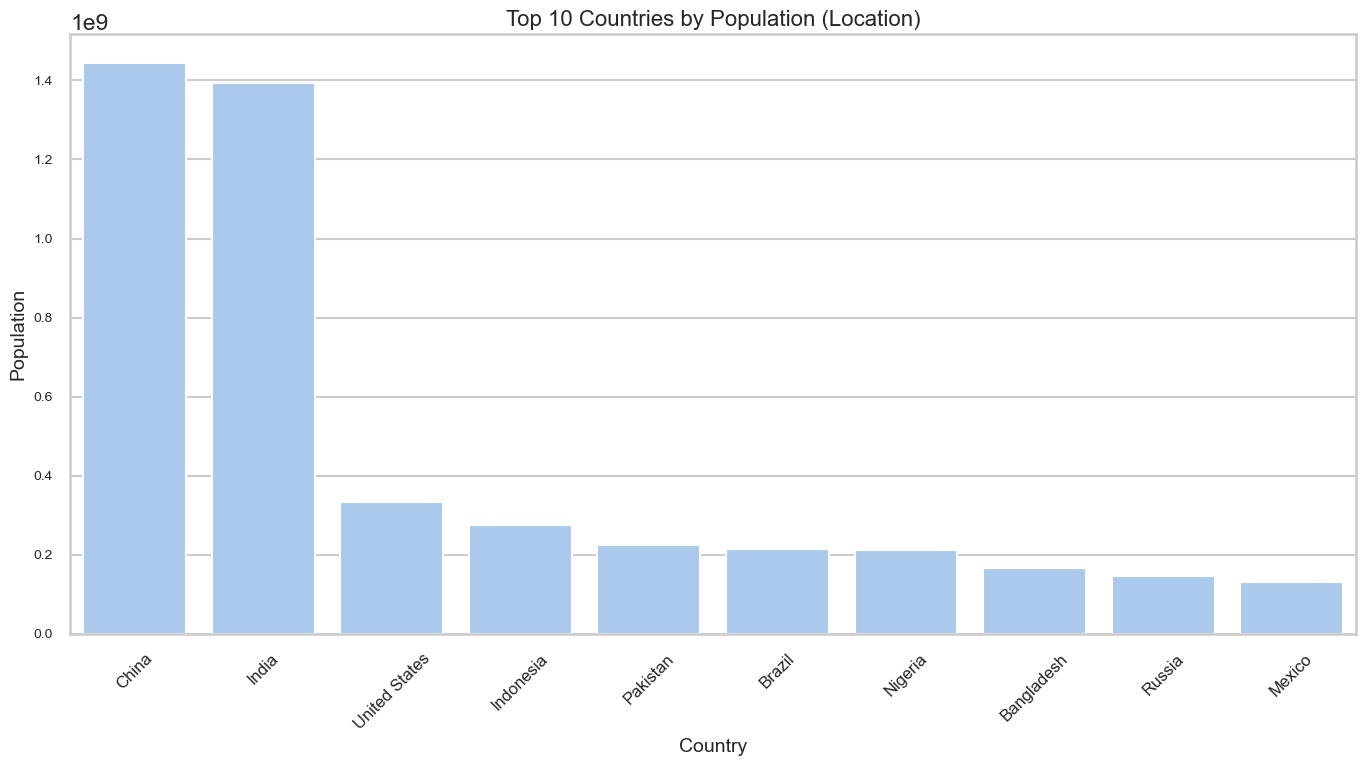

In [75]:
# 2. Graf: Population per country using location
plt.figure(figsize=(14, 8))
sns.barplot(x="location", y="population", data=df_grouped_location)
plt.xticks(rotation=45, fontsize=12)
plt.title("Top 10 Countries by Population (Location)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**3) population vs. life expectancy**

In [76]:
df_life_expectancy = df[["location", "population", "continent", "life_expectancy"]].drop_duplicates()

In [77]:
fig_1 = px.scatter(
    df_life_expectancy,
    x="population",
    y="life_expectancy",
    color="continent",
    color_discrete_sequence=px.colors.qualitative.G10,
    title="Population vs. Life Expectancy",
    log_x=True,
    template="plotly_white"
)

fig_1.update_layout(
    title=dict(
        text="Population vs. Life Expectancy",
        x=0.5,
        xanchor="center"
    ),
    xaxis=dict(
        title="Population (Log Scale)",
        showgrid=True,
    ),
    yaxis=dict(
        title="Life Expectancy (Years)",
        showgrid=True,
    ),
    legend=dict(
        title="Continent",
        orientation="h",
        x=0.5,
        xanchor="center",
        y=-0.3
    ),
)

fig_1.update_traces(marker=dict(size=10, opacity=0.8, line=dict(width=1, color="black")))

fig_1.show()

**4) number of diagnosed cases**

In [78]:
df_my_country = df[(df["location"] == "United States") | (df["location"] == "India")]

In [79]:
fig_2 = px.line(
    df_my_country,
    x="date",
    y="new_cases",
    color="location",
    color_discrete_sequence=px.colors.qualitative.Dark24_r,
    title="Number of Diagnosed COVID-19 Cases Over Time",
    template="plotly_white",
)

fig_2.update_layout(
    title=dict(
        text="Number of Diagnosed COVID-19 Cases Over Time",
        x=0.5,
        xanchor="center",
    ),
    yaxis_title="New Cases per Day",
    xaxis_title="Date",
    xaxis=dict(
        showgrid=True,
    ),
    yaxis=dict(
        showgrid=True,
    ),
    legend=dict(
        title="Country",
        orientation="h",
        x=0.5,
        xanchor="center",
        y=-0.2 
    )
)

fig_2.show()

**5) COVID Map**

In [ ]:
df_map = df[df['date'] == df['date'].max()]

df_map['cases to population'] = df_map['total_cases'] / df_map['population']

In [81]:
fig_map = px.scatter_geo(
    data_frame=df_map,
    lat='latitude',
    lon='longitude',
    color="continent",
    hover_name="location",
    hover_data=["total_cases", "cases to population"],
    size="cases to population",
    color_discrete_sequence=px.colors.qualitative.Set2,
    projection="natural earth",
    title="COVID-19 Cases Distribution by Country",
)

fig_map.update_layout(
    title=dict(
        text="COVID-19 Map: Cases by Country",
        x=0.5,
        xanchor="center",
        y=0.95
    ),
    geo=dict(
        scope="world",
        showland=True,
        landcolor="#edeef0",
        showocean=True,
        oceancolor="#e0ecff",
        projection_type="natural earth",
        lataxis_showgrid=True,
        lonaxis_showgrid=True,
    ),
    margin={"r":0,"t":40,"l":0,"b":0},
    coloraxis_colorbar_title="Continent",
    showlegend=True,
)

fig_map.show()

**6) dashboard**

In [82]:
countries = df['location'].unique().tolist()
countries_dict = [{'label': location, 'value': location} for location in countries]

In [83]:
app = dash.Dash()

app.layout = html.Div(children=[
    html.H1("COVID-19 Dashboard"),
    html.Label("Select a country:"),
    dcc.Dropdown(
        id="dropdown",
        options=[{'label': location, 'value': location} for location in countries],
        value="United States"
    ),

    html.Div(children=[
            dcc.Graph(id="fig_3"),  # Graph for cumulative positive cases
            dcc.Graph(id="fig_4")   # Graph for cumulative deaths
        ],
        style={'display': 'flex', 'justify-content': 'space-between'}
    )
])

# Callback for updating the positive cases graph
@app.callback(
    Output("fig_3", "figure"),
    Input("dropdown", "value")
)
def update_cases_graph(selected_country):
    filtered_df = df[df["location"] == selected_country]
    fig_3 = px.line(
        filtered_df,
        x="date",
        y="total_cases",
        color="location",
        title=f"Cumulative number of positive cases in {selected_country}"
    )
    fig_3.update_layout(
        title=dict(
            text=f"Cumulative number of positive cases in {selected_country}",
            x=0.5,
            xanchor="center"
        ),
        yaxis_title="Positive cases",
        xaxis_title="Date"
    )
    return fig_3

# Callback for updating the deaths graph
@app.callback(
    Output("fig_4", "figure"),
    Input("dropdown", "value")
)
def update_deaths_graph(selected_country):
    filtered_df = df[df["location"] == selected_country]
    fig_4 = px.line(
        filtered_df,
        x="date",
        y="total_deaths",
        color="location",
        title=f"Cumulative number of deaths in {selected_country}"
    )
    fig_4.update_layout(
        title=dict(
            text=f"Cumulative number of deaths in {selected_country}",
            x=0.5,
            xanchor="center"
        ),
        yaxis_title="Deaths",
        xaxis_title="Date"
    )
    return fig_4

if __name__ == "__main__":
    app.run_server(debug=True)